# Examen Módulo 2

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

# ANTES DE EMPEZAR

Escribe tu número de expediente como semilla

In [2]:
import numpy as np
np.random.seed(752235)
print("Integración Monte Carlo tipo 1 - Problema ", np.random.choice([1, 2]))
print("Integración Monte Carlo tipo 2 - Problema ", np.random.choice([1, 2]))

Integración Monte Carlo tipo 1 - Problema  2
Integración Monte Carlo tipo 2 - Problema  2


---
### Caminata aleatoria

Una persona entra a un casino con 20 pesos.

Su apuesta inicial es de 10 pesos, y tiene la idea de modificar su apuesta de la siguiente manera:
- Si gana, disminuye su apuesta en 2 pesos
- Si pierde, aumenta su apuesta en 2 pesos

Este jugador apostará hasta que haya ganado lo suficiente para que su apuesta se vuelva 0 o cuando quede en bancarrota.

1. ¿Cuál es el capital esperado?
2. En promedio, ¿cuánto apostará en el tercer juego?
3. ¿Cuál es la probabilidad de que quede en bancarrota?
4. ¿Cuál es la probabilidad de que "gane"? (Que su apuesta se vuelva cero)

In [3]:
import numpy as np
import pandas as pd

d = 20
a = 10
n = 10000
posibilidades = ["GANA", "PIERDE"]
resultados = []

for i in range(n):
    apuesta = np.random.choice(posibilidades)
    resultados.append(apuesta)

    if apuesta == "GANA":
        a = max(0, a - 2)
        d += 2
    else:
        a += 2
        d -= 2

    if d <= 0 or a <= 0:
        break

df_resultados = pd.DataFrame(resultados, columns=["Resultado"])
conteo_resultados = df_resultados.value_counts()

if len(df_resultados) > 0:
    resultado_final = df_resultados.loc[df_resultados.index[-1], "Resultado"]
    bancarrota = 1 if resultado_final == "PIERDE" else 0
    gane = 1 if resultado_final == "GANA" else 0
else:
    bancarrota = 0
    gane = 0

apuesta = a

bancarrota, gane, apuesta, conteo_resultados


(1,
 0,
 30,
 Resultado
 PIERDE       27
 GANA         17
 Name: count, dtype: int64)

---
### Simulación Monte Carlo

Jugadores A y B están jugando a tirar una moneda sesgada (60\% de probabilidad de caer en águila) por turnos. El jugador A empieza el juego y luego va el jugador B. Se lanza la moneda por turnos hasta que alguien tira águila y gana. ¿Cuál es la probabilidad de que el jugador A gane?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def montecarlo_tipo1(f, a, b, n):
  u = np.random.uniform(a, b, n)
  return np.mean (f(u))*(b-a)

def lanzar_moneda():
    return np.random.choice(["Aguila", "Sello"], p=[0.6, 0.4])

In [5]:
def simular_juego():
    while True:
        if lanzar_moneda() == "Aguila":
            return "A"
        if lanzar_moneda() == "Aguila":
            return "B"

def calcular_probabilidad_a_ganar(n):
    resultados = []

    for _ in range(n):
        ganador = simular_juego()
        resultados.append(ganador)

    victorias_a = resultados.count("A")
    victorias_b = resultados.count("B")

    df_resultados = pd.DataFrame({
        "Victorias A": [victorias_a],
        "Victorias B": [victorias_b],
        "Total Juegos": [n]
    })

    return df_resultados, victorias_a / n

n = 10000
resultados, probabilidad_a_ganar = calcular_probabilidad_a_ganar(n)


print(resultados)
print("probabilidad de que A gane:" , probabilidad_a_ganar)



   Victorias A  Victorias B  Total Juegos
0         7246         2754         10000
probabilidad de que A gane: 0.7246


---
### Integración Monte Carlo tipo 1 - Problema 1
$$ f_1(x) = 5\frac{\sin{x}}{x} $$
$$ f_2(x) = \frac{1}{8} $$

Dadas $f_1$ y $f_2$, ¿cuál es el área que hay entre las dos curvas en un intervalo de $[0.1, 7]$? (Aproxima los cruces)

In [39]:
def f1(x):
  return 5*(np.sin(x)/x)

montecarlo_tipo1(f1, 0.1, 7, 1000)

6.8602698041032415

In [50]:
def f2(x):
  return np.array([1/8]*len(x))

montecarlo_tipo1(f2, 0.1, 7, 1000)

0.8625

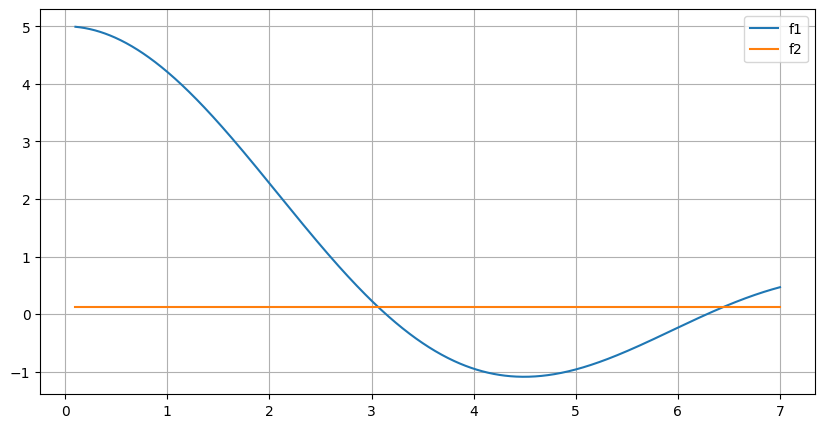

In [54]:
plt.figure(figsize=(10, 5))
x = np.linspace(0.1, 7, 1000)
plt.plot(x, f1(x), label="f1")
plt.plot(x, f2(x), label="f2")
plt.legend()
plt.grid()
plt.show()

In [56]:
n = 1000
a = 0.1
b = 7

area_f1 = montecarlo_tipo1(f1, a, b, n)
area_f2 = montecarlo_tipo1(f2, a, b, n)

area1= abs(area_f1 - area_f2)

area_f1, area_f2, area1

(6.804105613002661, 0.8625, 5.941605613002661)

El area total estimada para este problema es de 5.94

### Integración Monte Carlo tipo 1 - Problema 2
$$ f_1(x) = \sin{(x)} e^{-x} $$
$$ f_2(x) = \frac{x}{10} $$

Dadas $f_1$ y $f_2$, ¿cuál es el área que hay entre las dos curvas en un intervalo de $[0, 4]$? (Aproxima los cruces)

In [19]:
def f1_2(x):
  return np.sin(x)*np.exp(-x)

montecarlo_tipo1(f1, 0, 4, 1000)

0.5117060035698651

In [20]:
def f2_2(x):
  return x/10

montecarlo_tipo1(f2, 0 , 4, 1000)

0.7825706800422609

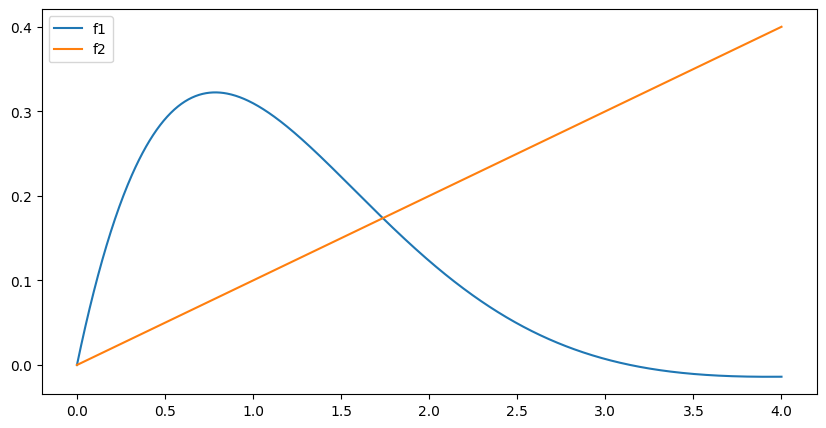

In [21]:
plt.figure(figsize=(10, 5))
x = np.linspace(0, 4, 1000)
plt.plot(x, f1_2(x), label="f1")
plt.plot(x, f2_2(x), label="f2")
plt.legend()
plt.show()

In [55]:
n = 1000
a = 0
b = 4

area_f1_2 = montecarlo_tipo1(f1_2, a, b, n)
area_f2_2 = montecarlo_tipo1(f2_2, a, b, n)

area1_2= abs(area_f1_2 - area_f2_2)

area_f1_2, area_f2_2, area1_2


(0.5043945648421665, 0.7900949702600747, 0.2857004054179082)

El area total es de 0.28

---
### Integración Monte Carlo tipo 2 - Problema 1

Se tienen las siguientes desigualdades:

1.
$$ ((\frac{x}{4})^2 + (\frac{y-1}{2.5})^2 < 1)\ \& \ ((x+1.5)^2 + (y-1)^2 > 0.2) \ \& \ ((x-1.5)^2 + (y-1)^2 > 0.2) $$


2. $$ (x+3)^2 + (y-4)^2 < 2 $$


3. $$ (x-3)^2 + (y-4)^2 < 2 $$

4. $$ x^2 + (\frac{y+5}{2})^2 < 8 $$

1. Crea una función de Python para cada desigualdad.

In [64]:
import numpy as np

def des1(x, y):
    return ((x/4)**2 + ((y - 1)/2.5)**2 < 1) & ((x + 1.5)**2 + (y - 1)**2 > 0.2) & ((x - 1.5)**2 + (y - 1)**2 > 0.2)

def des2(x, y):
    return (x + 3)**2 + (y - 4)**2 < 2

def des3(x, y):
    return (x - 3)**2 + (y - 4)**2 < 2

def des4(x, y):
    return x**2 + ((y + 5)/2)**2 < 8


2. Crea una función que agrupe estas desigualdades (utiliza el operador `|` para unir las desigualdades)

In [65]:
def region(x, y):
    return des1(x, y) | des2(x, y) | des3(x, y) | des4(x, y)

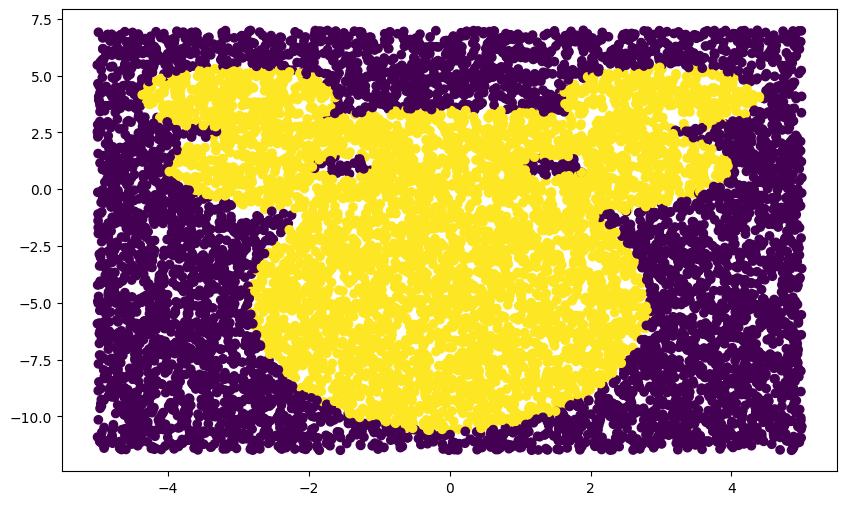

In [72]:
def montecarlo_tipo2(f, ax, bx, ay, by, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    AR = (bx - ax) * (by - ay)
    return np.mean(f(x, y)) * AR

ax = -5
bx = 5
ay = -11.5
by = 7
n = 10000

x = np.random.uniform(ax, bx, n)
y = np.random.uniform(ay, by, n)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=region(x, y))
plt.show()

3. Encuentra los límites de integración

In [56]:
ax = -5
bx = 5
ay = -11.5
by = 7

4. Aproxima el área de la región descrita por la agrupación de las desigualdades con 1 millón de puntos.

In [74]:
n = 1000000
area_estimada = montecarlo_tipo2(region, ax, bx, ay, by, n)
area_estimada

86.405175

El areá estimada según el código es de 86.40 tomando en cuenta las dos diferentes funciones

5. ¿Cuál es el error relativo?

In [81]:
ax = -5
bx = 5
ay = -11.5
by = 7
n = 10000

a1 = montecarlo_tipo2(des1,ax, bx, ay, by, n)
a2 = montecarlo_tipo2(des2,ax, bx, ay, by, n)
a3 = montecarlo_tipo2(des3,ax, bx, ay, by, n)
a4 = montecarlo_tipo2(des4,ax, bx, ay, by, n)

valor = a1+a2+a3+a4
valor

93.2215

In [84]:
erel = abs((valor - area_estimada) / valor) * 100
erel

7.311966660051604

### Integración Monte Carlo tipo 2 - Problema 2

Se quiere calcular el volumen de una alberca donde su superficie está dada por la siguiente desigualdad:
$$ (x^2 + (\frac{y}{2})^2 \leq 1)\ | \ ((x-1)^2 + (y+2)^2 \leq 2) $$

1. Define una función en Python para la desigualdad y utilízala para encontrar límites de integración adecuados para esta superficie.

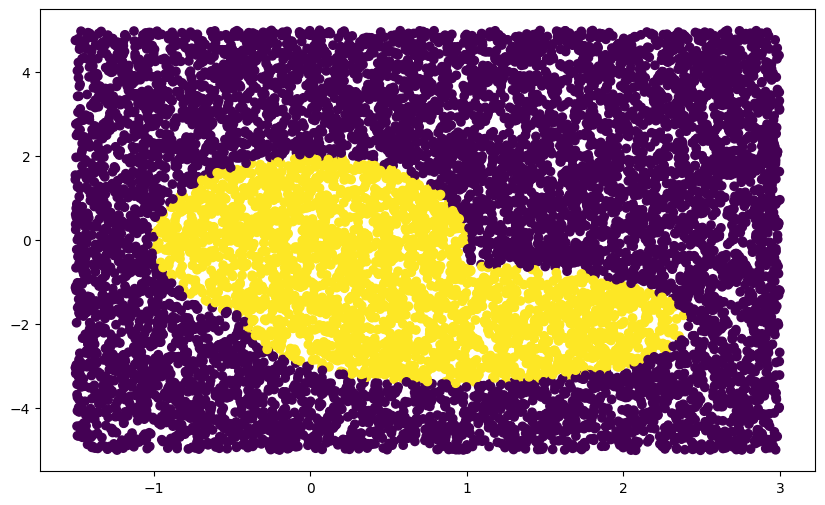

In [87]:
def region (x, y):
  return (x**2 + (y/2)**2 <= 1) | ((x-1)**2 + (y + 2)**2 <= 2)

def montecarlo_tipo2(f, ax, bx, ay, by):
  x = np.random.uniform(ax, bx, n)
  y = np.random.uniform(ay, by, n)
  AR = (bx - ax)*(by-ay)
  return np.mean(f(x,y))*AR

ax = 3
bx = -1.5
ay = -5
by = 5
n = 10000
x=np.random.uniform(ax, bx, n)
y=np.random.uniform(ay, by, n)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=region(x,y))
plt.show()


La profundidad de la alberca debe ser de $1.35$ metros. En otras palabras

$$ (z \leq 0)\ \& \ (z \geq -1.35)$$

2. Define una función para esta desigualdad de profundidad.

In [90]:
def f3(z):
  return (z <= 0) & (z >= -1.35)

3. Define una función que agrupe estas desigualdades (utiliza el operador `&` para unir las desigualdades)

In [91]:
def f4(x, y, z):
  return region(x, y) & f3(z)

4. Aproxima el volumen.

In [92]:
def montecarlo_tipo2(f, ax, bx, ay, by, az, bz, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    z = np.random.uniform(az, bz, n)
    AR = (bx - ax) * (by - ay) * (bz - az)
    return np.mean(f(x, y, z)) * AR

ax, bx = -1.5, 3
ay, by = -5, 5
az, bz = -1.35, 0
n = 10000

volumen_aproximado = montecarlo_tipo2(f4, ax, bx, ay, by, az, bz, n)
volumen_aproximado

15.454800000000002

El volumen total es de 15 m3